In [191]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('./kaggle/input/mushroom_classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./kaggle/input/mushroom_classification\sample_submission.csv
./kaggle/input/mushroom_classification\test.csv
./kaggle/input/mushroom_classification\train.csv
./kaggle/input/mushroom_classification\.ipynb_checkpoints\sample_submission-checkpoint.csv
./kaggle/input/mushroom_classification\.ipynb_checkpoints\test-checkpoint.csv


# Importing required packages and datasets

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import matthews_corrcoef

df_train = pd.read_csv("./kaggle/input/mushroom_classification/train.csv")
df_test = pd.read_csv("./kaggle/input/mushroom_classification/test.csv")


In [193]:
print(df_train)
print(df_test)

              id class  cap-diameter cap-shape cap-surface cap-color  \
0              0     e          8.80         f           s         u   
1              1     p          4.51         x           h         o   
2              2     e          6.94         f           s         b   
3              3     e          3.88         f           y         g   
4              4     e          5.85         x           l         w   
...          ...   ...           ...       ...         ...       ...   
3116940  3116940     e          9.29         f         NaN         n   
3116941  3116941     e         10.88         s         NaN         w   
3116942  3116942     p          7.82         x           e         e   
3116943  3116943     e          9.45         p           i         n   
3116944  3116944     p          3.20         x           s         g   

        does-bruise-or-bleed gill-attachment gill-spacing gill-color  ...  \
0                          f               a            c 

# Remove id attribute

In [194]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

# Encode class attribute using LabelEncoder

In [195]:
df_train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [196]:
df_train['class'].nunique()

2

#### There are only two uniqe values in class attribute. "e" and "p". Therefore "e" will be replaced with 0 and "p" will be replaced with 1

In [197]:
label_encoder = LabelEncoder()
df_train['class'] = label_encoder.fit_transform(df_train['class'])

In [198]:
df_train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,0,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,0,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,0,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


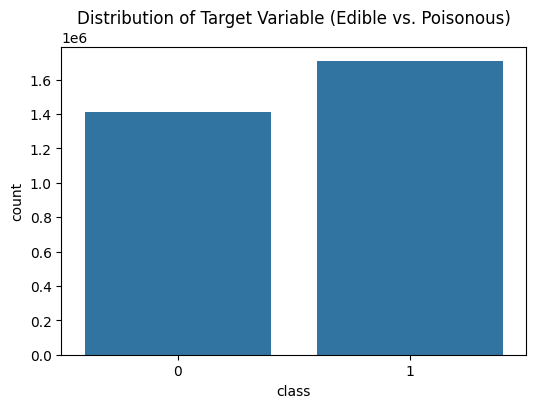

In [199]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df_train)
plt.title('Distribution of Target Variable (Edible vs. Poisonous)')
plt.show()

# Seperate target set and Feature set

In [200]:
df_train_class = df_train["class"]
df_train_class_removed = df_train.drop("class", axis=1)

In [201]:
df_train_class_removed.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [202]:
df_train_class_removed.isnull().sum()

cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

#### According to the above result, it indicates that there are missing values in dataset

# Handle columns with highly missing values

In [203]:
missing_percentage_in_train = df_train_class_removed.isnull().mean()*100
missing_percentage_in_test = df_test.isnull().mean()*100

In [204]:
print(f"Missing data percentage in train set: {missing_percentage_in_train}")

Missing data percentage in train set: cap-diameter             0.000128
cap-shape                0.001283
cap-surface             21.528227
cap-color                0.000385
does-bruise-or-bleed     0.000257
gill-attachment         16.809280
gill-spacing            40.373988
gill-color               0.001829
stem-height              0.000000
stem-width               0.000000
stem-root               88.452732
stem-surface            63.551362
stem-color               0.001219
veil-type               94.884350
veil-color              87.936970
has-ring                 0.000770
ring-type                4.134818
spore-print-color       91.425482
habitat                  0.001444
season                   0.000000
dtype: float64


In [205]:
print(f"Missing data percentage in test set: {missing_percentage_in_test}")

Missing data percentage in test set: cap-diameter             0.000337
cap-shape                0.001492
cap-surface             21.506821
cap-color                0.000626
does-bruise-or-bleed     0.000481
gill-attachment         16.834796
gill-spacing            40.404694
gill-color               0.002358
stem-height              0.000048
stem-width               0.000000
stem-root               88.452543
stem-surface            63.595327
stem-color               0.001011
veil-type               94.878689
veil-color              87.880445
has-ring                 0.000914
ring-type                4.148051
spore-print-color       91.417224
habitat                  0.001203
season                   0.000000
dtype: float64


### Remove columns with more than 85% missing values from both datasets

In [206]:
high_missing_columns_in_train = missing_percentage_in_train[missing_percentage_in_train>85].index
high_missing_columns_in_test = missing_percentage_in_test[missing_percentage_in_test>85].index

In [207]:
print(f"Columns with more than 85% missing data in train set: {high_missing_columns_in_train}")
print(f"Columns with more than 85% missing data in test set: {high_missing_columns_in_test}")

Columns with more than 85% missing data in train set: Index(['stem-root', 'veil-type', 'veil-color', 'spore-print-color'], dtype='object')
Columns with more than 85% missing data in test set: Index(['stem-root', 'veil-type', 'veil-color', 'spore-print-color'], dtype='object')


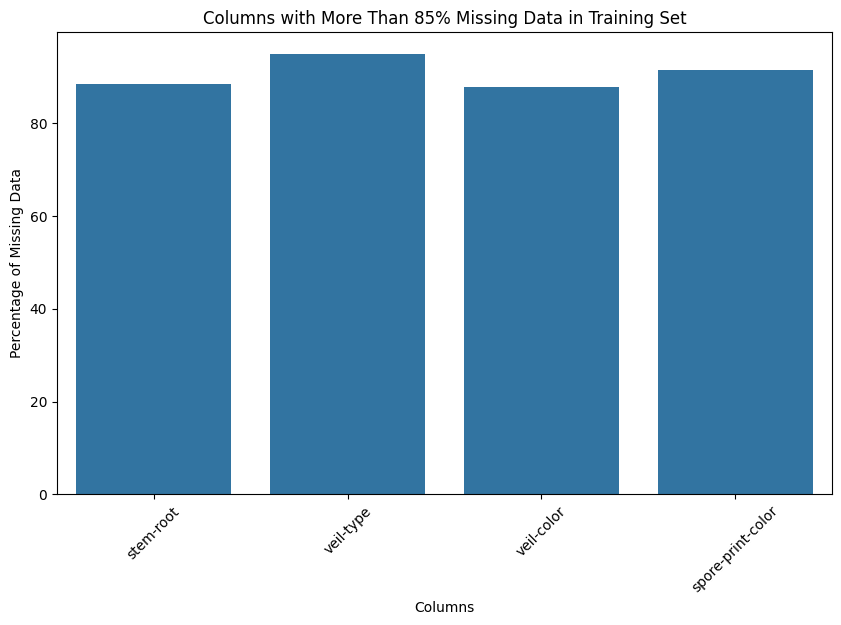

In [208]:
plt.figure(figsize=(10, 6))
sns.barplot(x=high_missing_columns_in_train, y=missing_percentage_in_train[high_missing_columns_in_train])
plt.title('Columns with More Than 85% Missing Data in Training Set')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Data')
plt.xticks(rotation=45)
plt.show()

In [209]:
df_train_class_removed = df_train_class_removed.drop(columns=high_missing_columns_in_train, axis=1)
df_test = df_test.drop(columns=high_missing_columns_in_test, axis=1)

In [210]:
print(df_train_class_removed.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             object 
 2   cap-surface           object 
 3   cap-color             object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-spacing          object 
 7   gill-color            object 
 8   stem-height           float64
 9   stem-width            float64
 10  stem-surface          object 
 11  stem-color            object 
 12  has-ring              object 
 13  ring-type             object 
 14  habitat               object 
 15  season                object 
dtypes: float64(3), object(13)
memory usage: 380.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diame

# Handle missing values in Numerical and Categorical datatypes

In [211]:
print(df_train_class_removed.isnull().sum())
print(df_test.isnull().sum())

cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-surface            1980861
stem-color                   38
has-ring                     24
ring-type                128880
habitat                      45
season                        0
dtype: int64
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-surface            1321488
stem-color                   21
has-ring                     19
ring-type                 86195
habitat                    

### We can clearly see that in both datasets, numeric and categorical values are same (ex: in both sets cap-color is categorical). 
### Therefore to handle missing values and impute, we create common variables that contains column names similar in both datasets

In [212]:
common_num_cols = df_train_class_removed.select_dtypes(exclude=['object']).columns
common_cat_cols = df_train_class_removed.select_dtypes(include=['object']).columns

In [213]:
print(f"Common numerical columns in both datasets: {train_num_cols}")
print(f"Common categorical columns in both datasets: {train_cat_cols}")

Common numerical columns in both datasets:          cap-diameter  stem-height  stem-width
0                8.80         4.51       15.39
1                4.51         4.79        6.48
2                6.94         6.85        9.93
3                3.88         4.16        6.53
4                5.85         3.37        8.36
...               ...          ...         ...
3116940          9.29        12.14       18.81
3116941         10.88         6.65       26.97
3116942          7.82         9.51       11.06
3116943          9.45         9.13       17.77
3116944          3.20         2.82        7.79

[3116945 rows x 3 columns]
Common categorical columns in both datasets:         cap-shape cap-surface cap-color does-bruise-or-bleed gill-attachment  \
0               f           s         u                    f               a   
1               x           h         o                    f               a   
2               f           s         b                    f               x   


### Distribution of numeric data types in training set

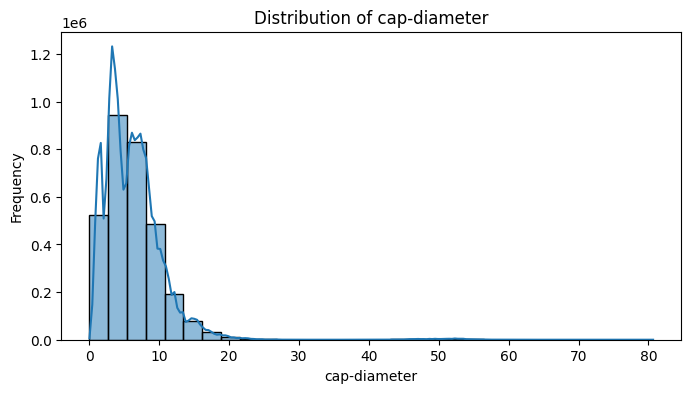

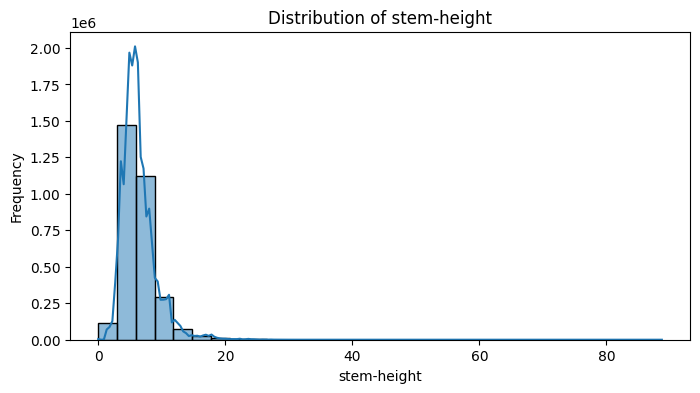

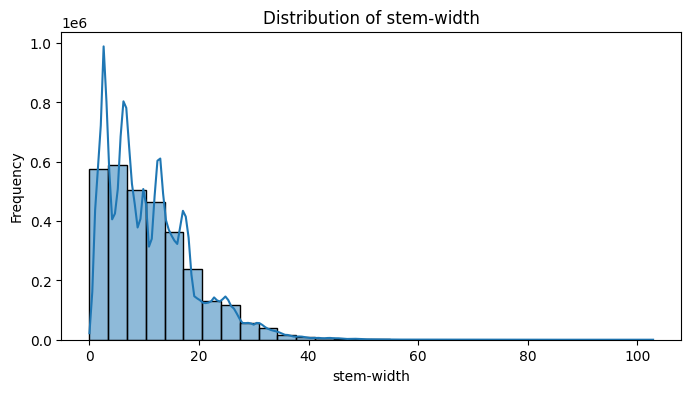

In [214]:
%matplotlib inline
for col in common_num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Distribution of categorical data types in training set

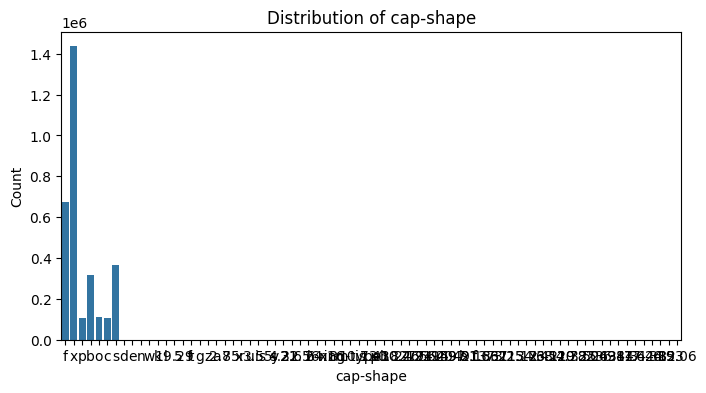

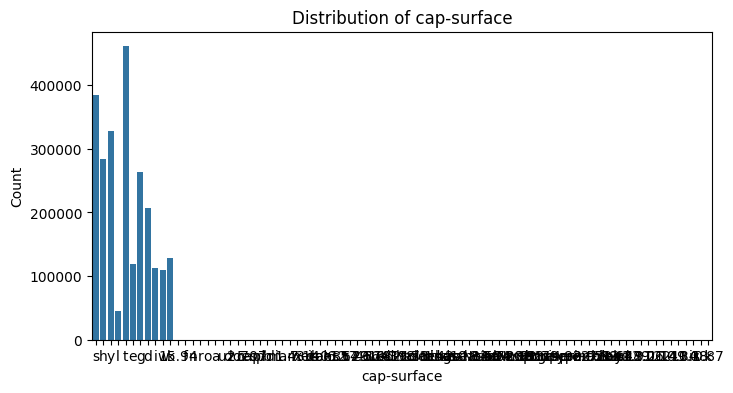

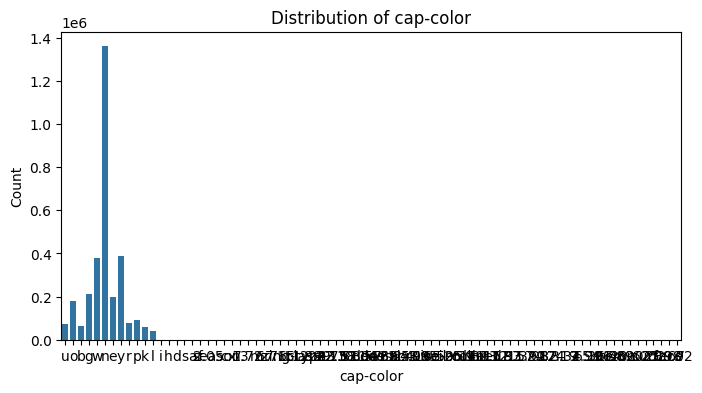

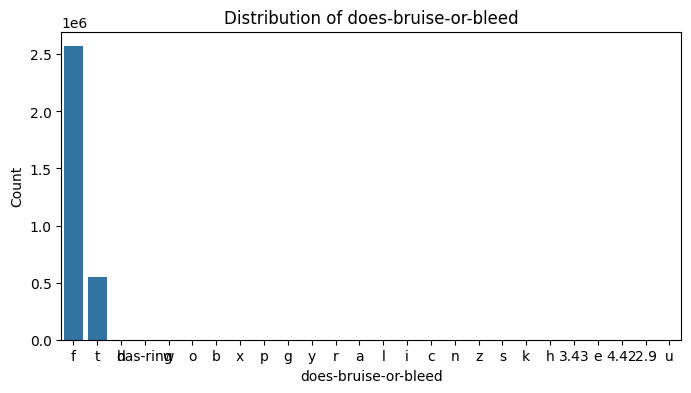

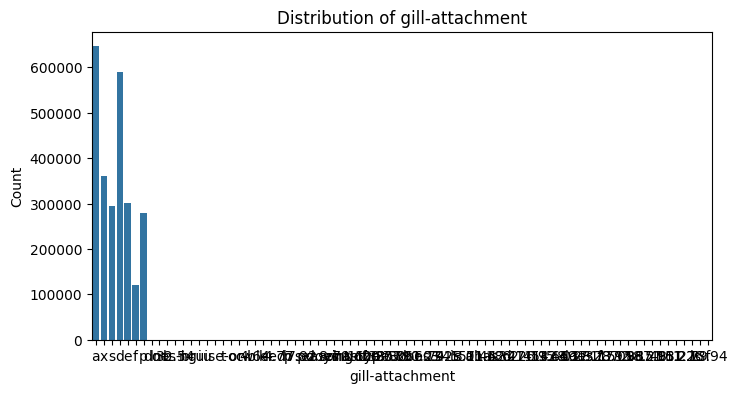

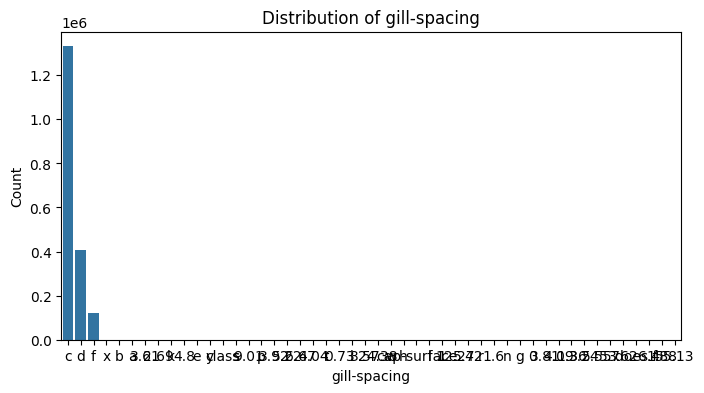

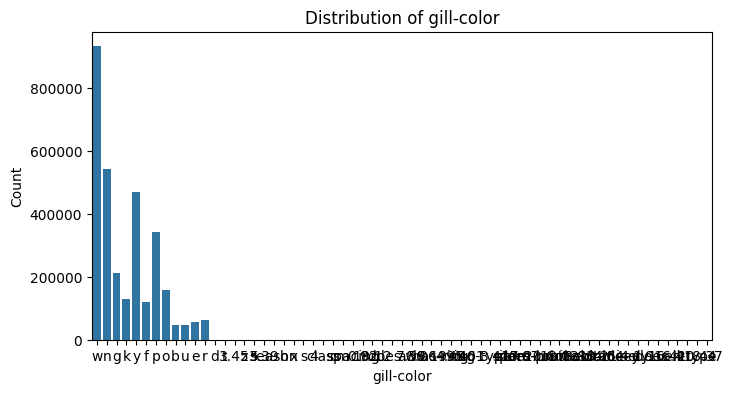

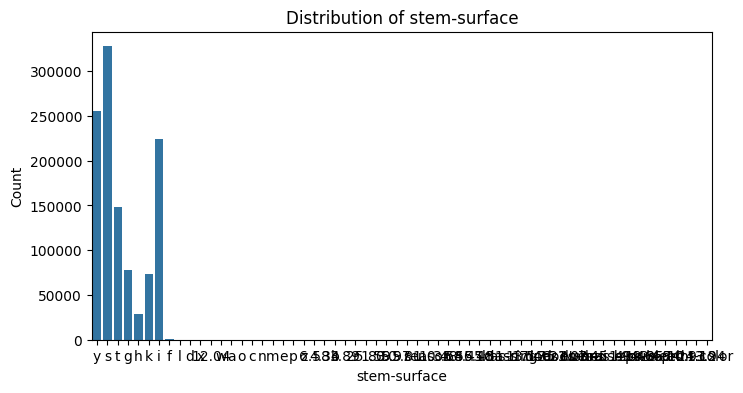

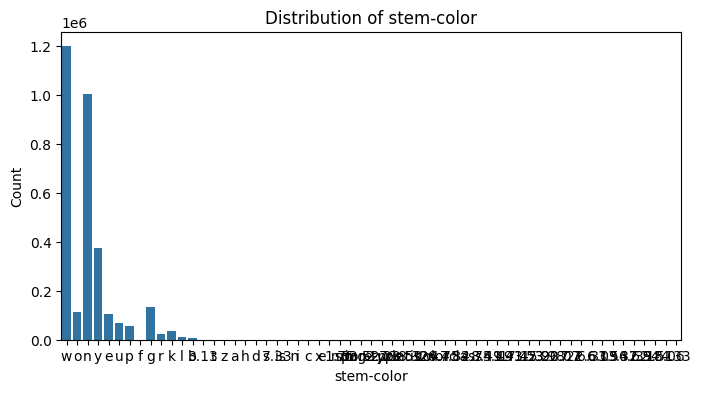

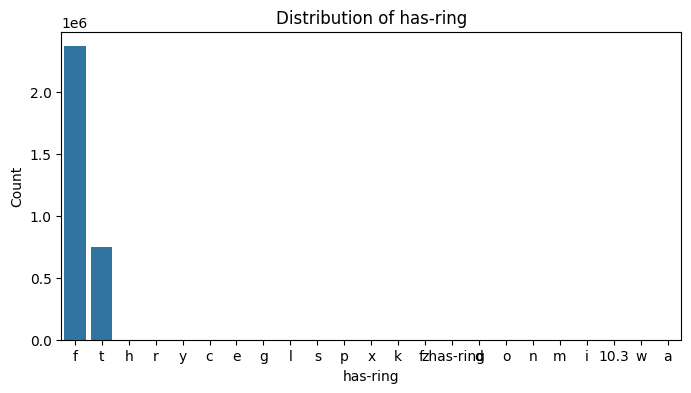

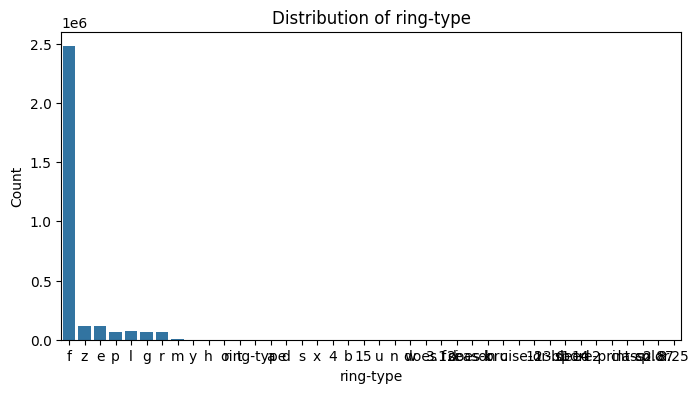

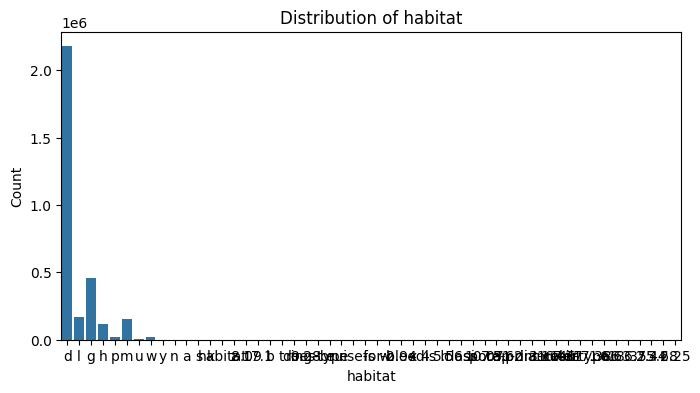

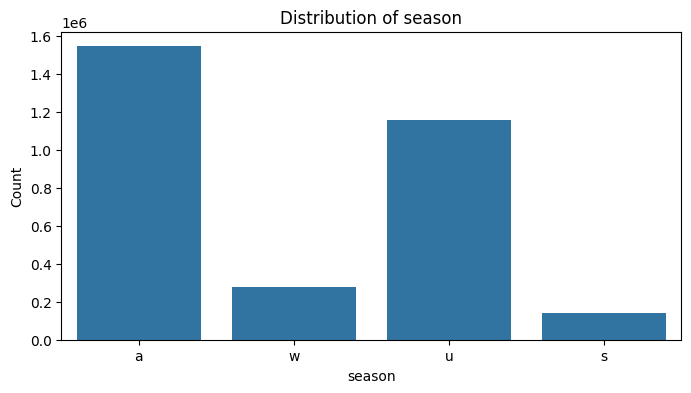

In [215]:
%matplotlib inline
for col in common_cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df_train)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

# Data preprocessing - Create pipeline to impute, encode and transform train set and test set

In [216]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_transformer_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('encoder',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

imputer_encoder_processor = ColumnTransformer(
   transformers=[
    ('numerical_transformer_pipeline',numerical_transformer_pipeline,common_num_cols),
    ('categorical_transformer_pipeline',categorical_transformer_pipeline,common_cat_cols)
   ]
)

df_train_class_removed = imputer_encoder_processor.fit_transform(df_train_class_removed)
df_test = imputer_encoder_processor.transform(df_test)

In [217]:
print(df_train_class_removed)

[[ 5.34605150e-01 -6.80926151e-01  5.23281731e-01 ...  1.80000000e+01
   2.50000000e+01  0.00000000e+00]
 [-3.86405464e-01 -5.77213012e-01 -5.77332980e-01 ...  3.90000000e+01
   2.50000000e+01  3.00000000e+00]
 [ 1.35285863e-01  1.85819368e-01 -1.51169035e-01 ...  1.80000000e+01
   3.60000000e+01  3.00000000e+00]
 ...
 [ 3.24211117e-01  1.17109419e+00 -1.15849020e-02 ...  3.90000000e+01
   2.50000000e+01  0.00000000e+00]
 [ 6.74152212e-01  1.03034064e+00  8.17273090e-01 ...  2.70000000e+01
   2.50000000e+01  2.00000000e+00]
 [-6.67646467e-01 -1.30690903e+00 -4.15514206e-01 ...  1.80000000e+01
   2.90000000e+01  2.00000000e+00]]


In [218]:
# pickle.dump(numerical_transformer_pipeline, open('./kaggle/output/mushroom_classification/new/numerical_pipeline.pkl', 'wb'))
# pickle.dump(categorical_transformer_pipeline, open('./kaggle/output/mushroom_classification/new/categorical_pipeline.pkl', 'wb'))

In [219]:
# pickle.dump(imputer_encoder_processor, open('./kaggle/output/mushroom_classification/new/imputer_encoder_pipeline.pkl', 'wb'))

# train-test split

In [220]:
x_train, x_test, y_train, y_test = train_test_split(df_train_class_removed,df_train_class, test_size=0.2,random_state=42, stratify=df_train_class)

# Random forest model

In [221]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)
random_forest_model.fit(x_train, y_train)
random_forest_pred = random_forest_model.predict(x_test)
random_forest_mcc = matthews_corrcoef(y_test, random_forest_pred)
print(f"Random forest MCC: {random_forest_mcc}")

Random forest MCC: 0.9778975303617735


# Logistic Regression model

In [222]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='saga',
    max_iter=500,
    random_state=42
)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
lr_mcc = matthews_corrcoef(y_test, lr_pred)
print(f"Logistic Regression MCC: {lr_mcc}")

Logistic Regression MCC: 0.26617825574752646


# Neural Network

In [223]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

nn_model.fit(x_train_scaled, y_train)
nn_pred = nn_model.predict(x_test_scaled)

nn_mcc = matthews_corrcoef(y_test, nn_pred)
print(f"Neural Network MCC: {nn_mcc}")


Neural Network MCC: 0.9781679112407062


# XGBooster model

In [224]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=150,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.7,
    min_child_weight=5,
    random_state=42
)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)
xgb_mcc = matthews_corrcoef(y_test, xgb_pred)
print(f"XGBooster MCC: {xgb_mcc}")

XGBooster MCC: 0.9795327400021033


In [225]:
# pickle.dump(xgb_model, open('./kaggle/output/mushroom_classification/new/xgb_model.pkl', 'wb'))
# pickle.dump(label_encoder, open('./kaggle/output/mushroom_classification/new/label_encoder.pkl', 'wb'))

In [226]:
test_pred = xgb_model.predict(df_test)
classes_encoded = label_encoder.inverse_transform(test_pred)

df_sub=pd.read_csv("./kaggle/input/mushroom_classification/sample_submission.csv")

submission = pd.DataFrame({
    'id': df_sub['id'],
    'class': classes_encoded
})

submission.to_csv('./kaggle/output/mushroom_classification/new/submission.csv', index=False)
pd.read_csv('./kaggle/output/mushroom_classification/new/submission.csv')

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


In [227]:
# pd.read_csv('./kaggle/output/mushroom_classification/submission2222.csv')
# remove _new from pkl